In [338]:
import pandas as pd
import seaborn as sns

In [339]:
df = pd.read_csv('/Users/luwei/Desktop/MMAI/data sicence /kc_house_data.csv')

In [340]:
df.info()
#No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [341]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [342]:
pip install scikit-learn  

Note: you may need to restart the kernel to use updated packages.


In [343]:
#feature engineering 
import numpy as np

In [344]:
df['waterfront'].unique()

array([0, 1])

In [345]:
df['view'].unique()

array([0, 3, 4, 2, 1])

In [346]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [347]:
#Transform date into a datetime data format 

In [348]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [349]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [350]:
df['month'] = df['date'].dt.month

In [351]:
df['day'] = df['date'].dt.day

In [352]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [354]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


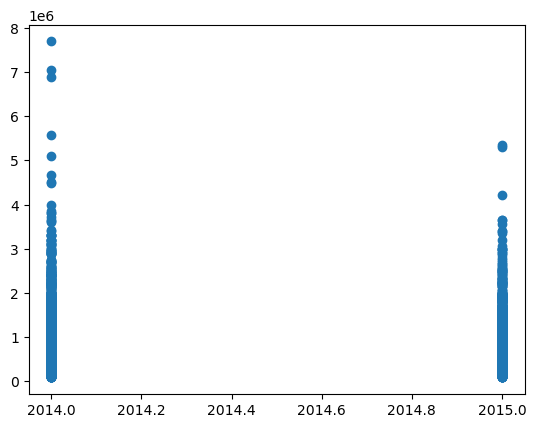

In [355]:
plt.scatter(df['year'],df['price'])

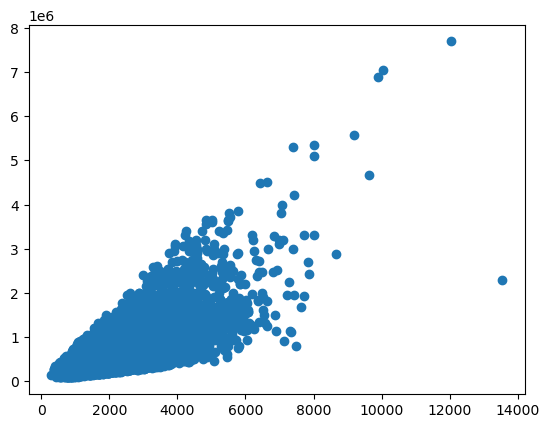

In [356]:
plt.scatter(df['sqft_living'],df['price'])

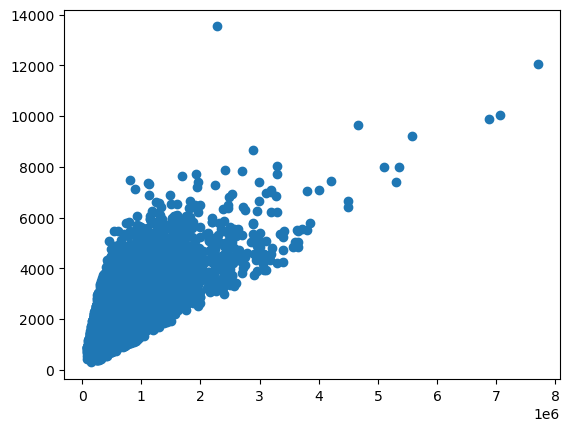

In [357]:
plt.scatter(df['price'],df['sqft_living'])

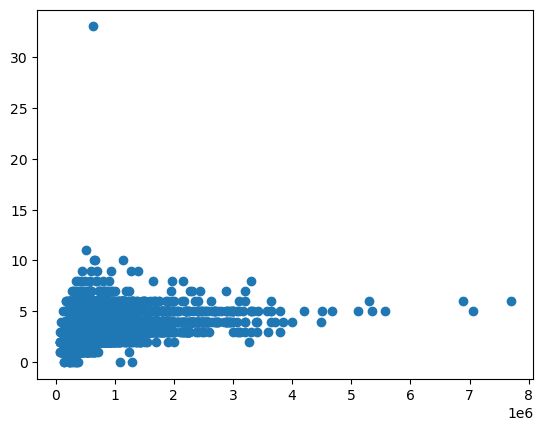

In [358]:
plt.scatter(df['price'],df['bedrooms'])

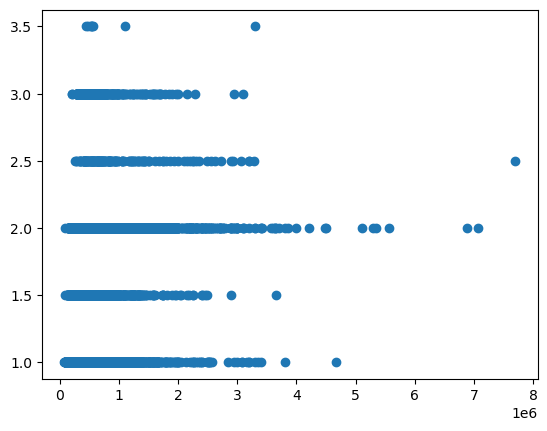

In [359]:
plt.scatter(df['price'],df['floors'])

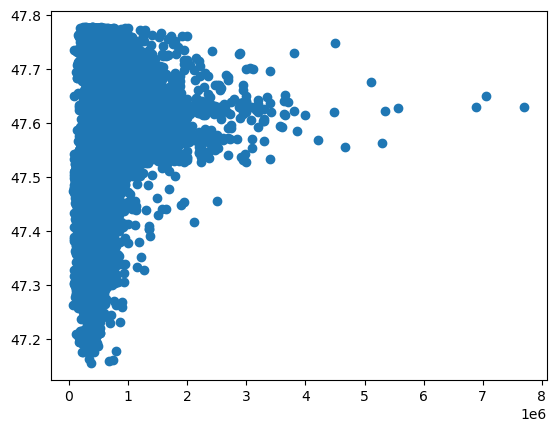

In [360]:
plt.scatter(df['price'],df['lat'])

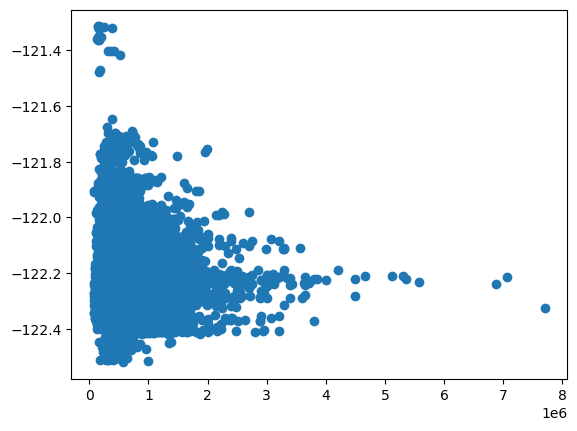

In [361]:
plt.scatter(df['price'],df['long'])

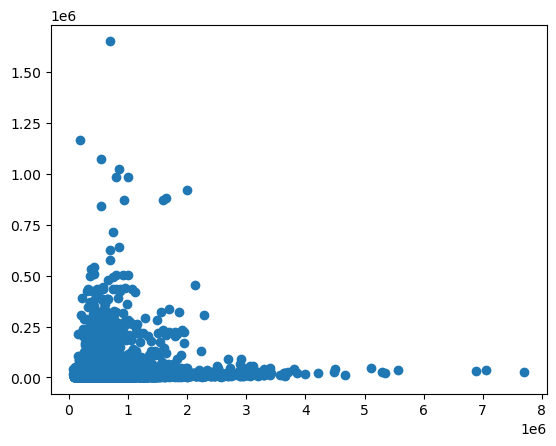

In [362]:
plt.scatter(df['price'],df['sqft_lot'])

In [363]:
results = ols("price ~ year + sqft_living + sqft_lot", data=df).fit()

In [364]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     7046.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:30   Log-Likelihood:            -3.0023e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21609   BIC:                         6.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.852e+07   7.65e+06     -5.033      

In [365]:
"y_hat = -3.852e+07 + 1.91e+04year + 283.1793sqft_living - 0.2917sqft_lot"

'y_hat = -3.852e+07 + 1.91e+04year + 283.1793sqft_living - 0.2917sqft_lot'

In [366]:
-3.852e+07 + (1.91e+04) *2014 + 283.1793 * 1340 - 0.2917 * 5650

325212.157

In [367]:
results = ols("price ~ year + sqft_living + sqft_above", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     7028.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:30   Log-Likelihood:            -3.0025e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21609   BIC:                         6.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.808e+07   7.66e+06     -4.973      

In [368]:
results = ols("price ~ floors + sqft_living + sqft_above", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     7024.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:30   Log-Likelihood:            -3.0025e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21609   BIC:                         6.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.785e+04   5911.484     -9.787      

In [369]:
results = ols("price ~ floors + sqft_living + condition", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     7197.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:30   Log-Likelihood:            -3.0012e+05
No. Observations:               21613   AIC:                         6.002e+05
Df Residuals:                   21609   BIC:                         6.003e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.373e+05   1.23e+04    -19.345      

In [370]:
results = ols("price ~ bedrooms + sqft_living + condition", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     7629.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:30   Log-Likelihood:            -2.9980e+05
No. Observations:               21613   AIC:                         5.996e+05
Df Residuals:                   21609   BIC:                         5.996e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.603e+04   1.11e+04     -7.718      

In [371]:
results = ols("price ~ bedrooms + bathrooms + condition", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     2905.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:30   Log-Likelihood:            -3.0394e+05
No. Observations:               21613   AIC:                         6.079e+05
Df Residuals:                   21609   BIC:                         6.079e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.253e+05    1.4e+04    -16.094      0.0

In [372]:
results = ols("price ~ lat + sqft_living + condition", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     9649.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:30   Log-Likelihood:            -2.9842e+05
No. Observations:               21613   AIC:                         5.968e+05
Df Residuals:                   21609   BIC:                         5.969e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.445e+07   5.61e+05    -61.376      

In [373]:
results = ols("price ~ lat + year +long", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     786.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:31   Log-Likelihood:            -3.0648e+05
No. Observations:               21613   AIC:                         6.130e+05
Df Residuals:                   21609   BIC:                         6.130e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.899e+07   1.05e+07     -3.729      0.0

In [374]:
results = ols("price ~ lat + grade +long", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     7357.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:31   Log-Likelihood:            -3.0000e+05
No. Observations:               21613   AIC:                         6.000e+05
Df Residuals:                   21609   BIC:                         6.000e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.405e+07    1.6e+06    -33.819      0.0

In [375]:
results = ols("price ~ lat +long", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     1178.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:31   Log-Likelihood:            -3.0649e+05
No. Observations:               21613   AIC:                         6.130e+05
Df Residuals:                   21610   BIC:                         6.130e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.872e+07   2.13e+06     -8.800      0.0

In [376]:
results = ols("price ~ year", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2764
Date:                Tue, 11 Jul 2023   Prob (F-statistic):              0.599
Time:                        00:01:31   Log-Likelihood:            -3.0760e+05
No. Observations:               21613   AIC:                         6.152e+05
Df Residuals:                   21611   BIC:                         6.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.115e+06   1.08e+07     -0.476      0.6

In [377]:
results = ols("price ~ lat + sqft_living +sqft_lot15", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     9411.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:31   Log-Likelihood:            -2.9857e+05
No. Observations:               21613   AIC:                         5.972e+05
Df Residuals:                   21609   BIC:                         5.972e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.391e+07   5.68e+05    -59.723      

In [378]:
results = ols("price ~ lat + sqft_living +long", data=df).fit()
print(results.summary())
#hightest R-squared value

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     9884.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:01:31   Log-Likelihood:            -2.9827e+05
No. Observations:               21613   AIC:                         5.965e+05
Df Residuals:                   21609   BIC:                         5.966e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.902e+07   1.49e+06    -46.330      

In [379]:
"y_hat =  -6.902e+07 + (6.72e+05)lat + 286.4517sqft_living + (-3.028e+05)long"

'y_hat =  -6.902e+07 + (6.72e+05)lat + 286.4517sqft_living + (-3.028e+05)long'

In [380]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [381]:
pred_vals = results.predict(df[['lat','sqft_living','long']])

In [382]:
pred_vals

0        262534.685229
1        820455.636595
2        290158.113915
3        533598.773062
4        412526.938054
             ...      
21608    516139.755001
21609    617683.130417
21610    285328.027783
21611    341574.806202
21612    285126.436489
Length: 21613, dtype: float64

In [383]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [384]:
res

,y_hat,price
0,262534.685229,221900.0
1,820455.636595,538000.0
2,290158.113915,180000.0
3,533598.773062,604000.0
4,412526.938054,510000.0
...,...,...
21608,516139.755001,360000.0
21609,617683.130417,400000.0
21610,285328.027783,402101.0
21611,341574.806202,400000.0


In [385]:
res['error'] = res['y_hat'] - res['price']

In [386]:
res.head

<bound method NDFrame.head of                y_hat     price          error
0      262534.685229  221900.0   40634.685229
1      820455.636595  538000.0  282455.636595
2      290158.113915  180000.0  110158.113915
3      533598.773062  604000.0  -70401.226938
4      412526.938054  510000.0  -97473.061946
...              ...       ...            ...
21608  516139.755001  360000.0  156139.755001
21609  617683.130417  400000.0  217683.130417
21610  285328.027783  402101.0 -116772.972217
21611  341574.806202  400000.0  -58425.193798
21612  285126.436489  325000.0  -39873.563511

[21613 rows x 3 columns]>

In [387]:
res['sq_error'] = res['error']**2

In [388]:
np.sqrt(res['sq_error'].mean())

238361.7700024827

In [389]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


(array([3.0000e+00, 1.0000e+00, 5.0000e+00, 1.8000e+01, 5.2000e+01,
        1.9000e+02, 2.1720e+03, 1.8754e+04, 4.1500e+02, 3.0000e+00]),
 array([-4224055.1852891 , -3647044.93534811, -3070034.68540711,
        -2493024.43546612, -1916014.18552513, -1339003.93558413,
         -761993.68564314,  -184983.43570214,   392026.81423885,
          969037.06417984,  1546047.31412084]),
 <BarContainer object of 10 artists>)

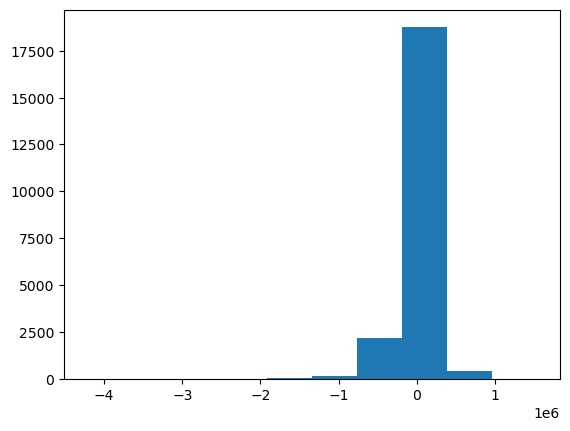

In [390]:
plt.hist(res['error'])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

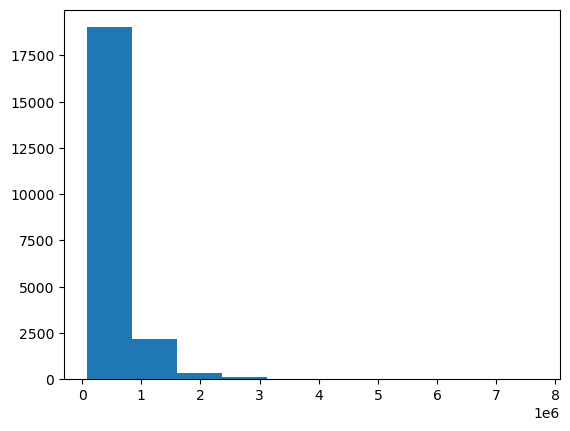

In [391]:
plt.hist(df['price'])

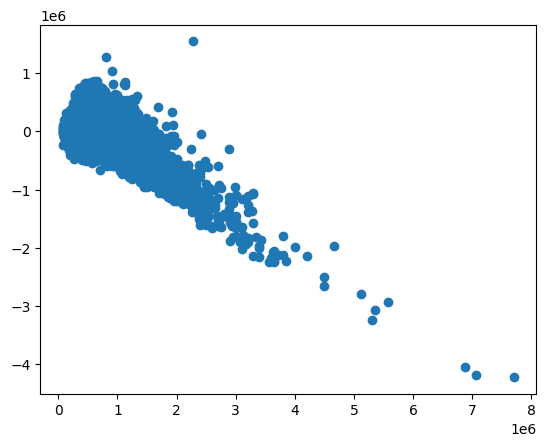

In [392]:
plt.scatter(df['price'],res['error'])

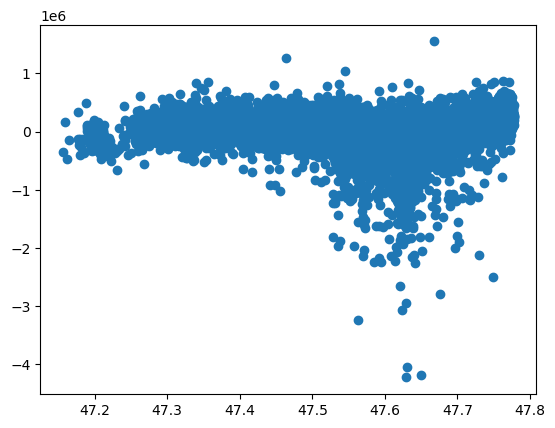

In [393]:
plt.scatter(df['lat'],res['error'])

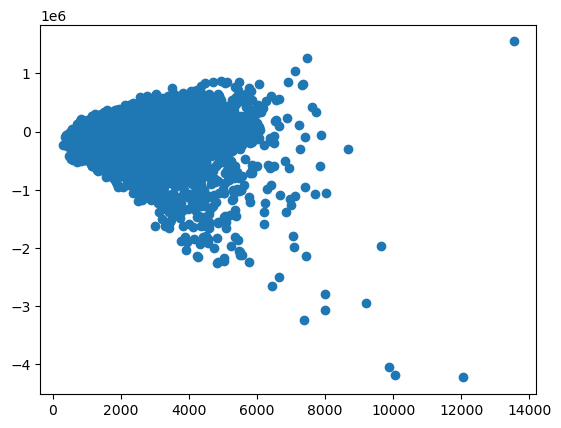

In [394]:
plt.scatter(df['sqft_living'],res['error'])

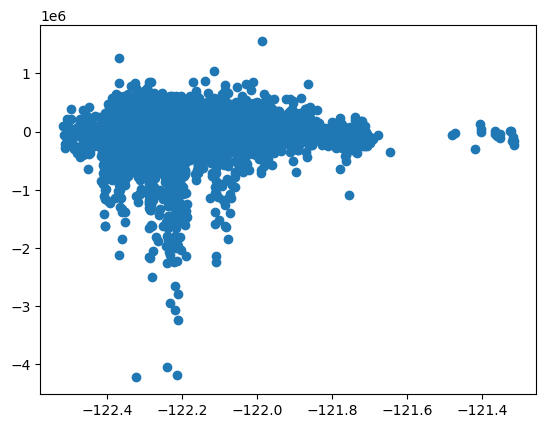

In [395]:
plt.scatter(df['long'],res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-4224055.1852891 , -4181754.46437711, -4052452.83361822, ...,
          1043536.88150447,  1269275.55828527,  1546047.31412084])),
 (213398.50224971538, 4.581186633483367e-07, 0.8951121503920694))

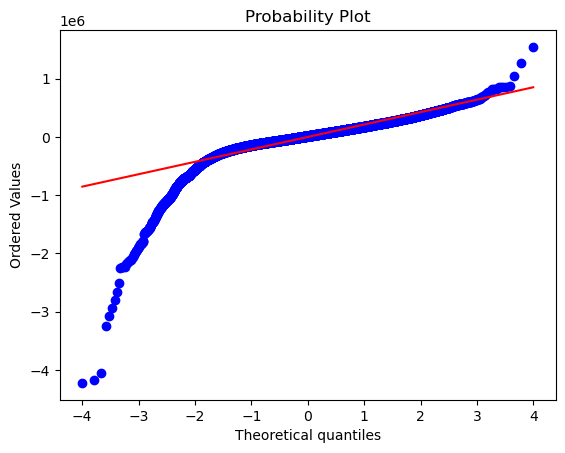

In [396]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [397]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept   dfb_lat  dfb_sqft_living  dfb_long       cooks_d  \
0          -0.000005  0.000367         0.001046  0.000140  6.943307e-07   
1           0.008927 -0.008136        -0.005177  0.005934  5.060175e-05   
2           0.000343 -0.004431         0.004888 -0.001340  1.251975e-05   
3          -0.002278 -0.000960         0.000446 -0.002684  2.904478e-06   
4           0.003235  0.001797        -0.002224  0.003967  6.598923e-06   
...              ...       ...              ...       ...           ...   
21608       0.004476 -0.004116         0.002071  0.002974  1.430115e-05   
21609       0.006145  0.003425        -0.003510  0.007555  2.584387e-05   
21610      -0.001278  0.000868        -0.003527 -0.000977  6.977329e-06   
21611       0.001925  0.000041        -0.001320  0.001966  1.868129e-06   
21612      -0.000436  0.000294        -0.001204 -0.000334  8.131634e-07   

       standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0           -0.170467  

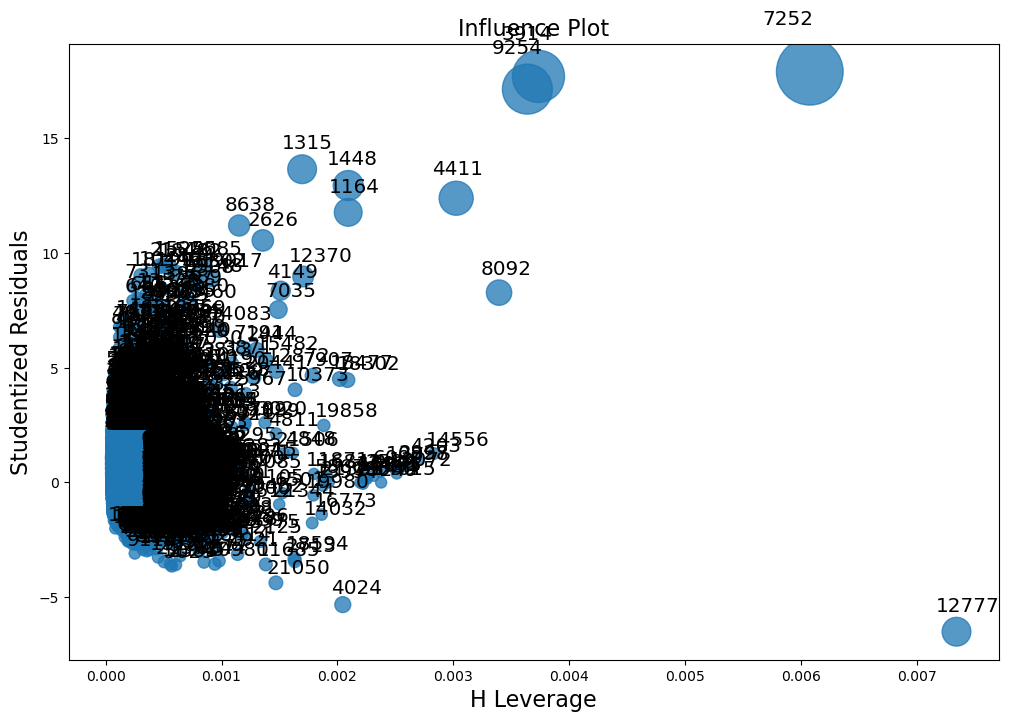

In [398]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [399]:
res

,y_hat,price,error,sq_error
0,262534.685229,221900.0,40634.685229,1.651178e+09
1,820455.636595,538000.0,282455.636595,7.978119e+10
2,290158.113915,180000.0,110158.113915,1.213481e+10
3,533598.773062,604000.0,-70401.226938,4.956333e+09
4,412526.938054,510000.0,-97473.061946,9.500998e+09
...,...,...,...,...
21608,516139.755001,360000.0,156139.755001,2.437962e+10
21609,617683.130417,400000.0,217683.130417,4.738595e+10
21610,285328.027783,402101.0,-116772.972217,1.363593e+10
21611,341574.806202,400000.0,-58425.193798,3.413503e+09


In [400]:
dummies_condition = pd.get_dummies(df.condition, dtype=int)

In [401]:
dummies_condition.rename(columns = {1:'poor_condition', 2:'Below_average_condition', 3:'average_condition', 4:'nice_condition', 5:'excellent_condition'}, inplace = True)

In [402]:
dummies_view = pd.get_dummies(df.view, dtype=int)

In [403]:
dummies_view.rename(columns = {1:'poor_view', 2:'average_view',  3:'nice_view', 4:'excellent_view'}, inplace = True)

In [404]:
df = pd.concat([df,dummies_condition,dummies_view], axis=1)

In [405]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,poor_condition,Below_average_condition,average_condition,nice_condition,excellent_condition,0,poor_view,average_view,nice_view,excellent_view
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,1,0,0,1,0,0,0,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,0,1,0,0,1,0,0,0,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,1,0,0,1,0,0,0,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21613 non-null  int64         
 1   date                     21613 non-null  datetime64[ns]
 2   price                    21613 non-null  float64       
 3   bedrooms                 21613 non-null  int64         
 4   bathrooms                21613 non-null  float64       
 5   sqft_living              21613 non-null  int64         
 6   sqft_lot                 21613 non-null  int64         
 7   floors                   21613 non-null  float64       
 8   waterfront               21613 non-null  int64         
 9   view                     21613 non-null  int64         
 10  condition                21613 non-null  int64         
 11  grade                    21613 non-null  int64         
 12  sqft_above               21613 n

In [407]:
daily_dataset = df.set_index('date').resample("D").agg({'lat':'max','sqft_living':'max','long':'mean','price':'sum','condition':'sum'})


In [408]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [409]:
df1 = pd.read_csv('/Users/luwei/Desktop/MMAI/data sicence /kc_house_data.csv')


In [410]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [411]:
#seperate features and target 
categorical_features = ['condition','grade', 'view']
numerical_features = ['lat','sqft_living', 'long']
target = 'price'

In [412]:
df[['condition','grade','view','lat','sqft_living','long']]


,condition,grade,view,lat,sqft_living,long
0,3,7,0,47.5112,1180,-122.257
1,3,7,0,47.7210,2570,-122.319
2,3,6,0,47.7379,770,-122.233
3,5,7,0,47.5208,1960,-122.393
4,3,8,0,47.6168,1680,-122.045
...,...,...,...,...,...,...
21608,3,8,0,47.6993,1530,-122.346
21609,3,8,0,47.5107,2310,-122.362
21610,3,7,0,47.5944,1020,-122.299
21611,3,8,0,47.5345,1600,-122.069


In [413]:
from sklearn.model_selection import train_test_split

In [414]:
#split data in train/test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target],test_size = 0.3, random_state=1234)

In [415]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [416]:
#define the transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [417]:
#building processors
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features), ('num', num_transformer, numerical_features)])

In [418]:
linear_regression = Pipeline(steps = [('preprocessor', preprocessor),('regressor', LinearRegression())
])

In [419]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition', 'grade',
                                                   'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'sqft_living',
                                                   'long'])])),
                ('regressor', LinearRegression())])

In [420]:
pred = linear_regression.predict(X_test)

In [421]:
pred

array([ 472180.27046789,  434980.89563063, 1159180.08361427, ...,
        422789.10335741,  553314.98728911,  457930.24969016])

In [422]:
from sklearn.metrics import mean_squared_error


In [423]:
np.sqrt(mean_squared_error(pred,y_test))

202530.39401208432

In [424]:
from sklearn.linear_model import Ridge

In [425]:
ridge_regression = Pipeline(steps = [('preprocessor', preprocessor),('regressor', Ridge(alpha=3.0))])

In [426]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition', 'grade',
                                                   'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'sqft_living',
                                                   'long'])])),
                ('regressor', Ridge(alpha=3.0))])

In [427]:
pred_ridge = ridge_regression.predict(X_test)

In [428]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

202208.97828996493

In [429]:
from sklearn.linear_model import Lasso

In [430]:
lasso_regression = Pipeline(steps = [('preprocessor', preprocessor),('regressor', Lasso(alpha=1.0))])

In [431]:
lasso_regression.fit(X_train, y_train)

/Users/luwei/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46694061137338.94, tolerance: 207065660607.36664
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition', 'grade',
                                                   'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'sqft_living',
                                                   'long'])])),
                ('regressor', Lasso())])

In [432]:
lasso_pred = lasso_regression.predict(X_test)

In [433]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

202481.4806699856

In [434]:
from sklearn.linear_model import ElasticNet

In [435]:
elasticnet_regression = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [436]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition', 'grade',
                                                   'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'sqft_living',
                                                   'long'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [437]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [438]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

225963.22435710978

In [445]:
y_test

12432     485000.0
7793      358000.0
13435     716500.0
1821      367500.0
12449     544000.0
           ...    
2596     1065000.0
21161     459990.0
20133     388500.0
11130     530000.0
16762     449400.0
Name: price, Length: 6484, dtype: float64

In [446]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)


In [447]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']


In [448]:
X_test

,condition,grade,view,lat,sqft_living,long
12432,4,8,0,47.5217,2030,-122.050
7793,3,8,0,47.3473,2510,-122.314
13435,3,11,0,47.4289,3630,-122.094
1821,4,7,0,47.7563,1660,-122.075
12449,3,8,0,47.5692,2030,-122.006
...,...,...,...,...,...,...
2596,3,8,0,47.6144,1890,-122.211
21161,3,8,0,47.4761,2680,-121.734
20133,3,8,0,47.3255,2718,-122.164
11130,4,8,0,47.6398,1980,-122.113


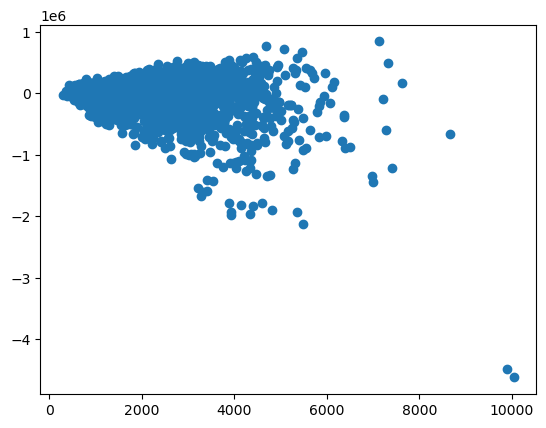

In [451]:
import matplotlib.pyplot as plt
plt.scatter(X_test['sqft_living'],elastic_net_pred['res'])

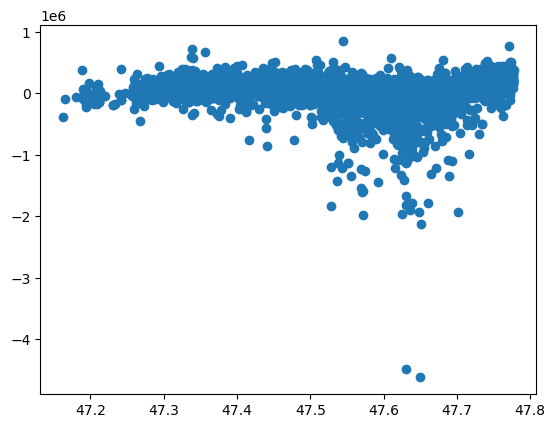

In [452]:
plt.scatter(X_test['lat'],elastic_net_pred['res'])

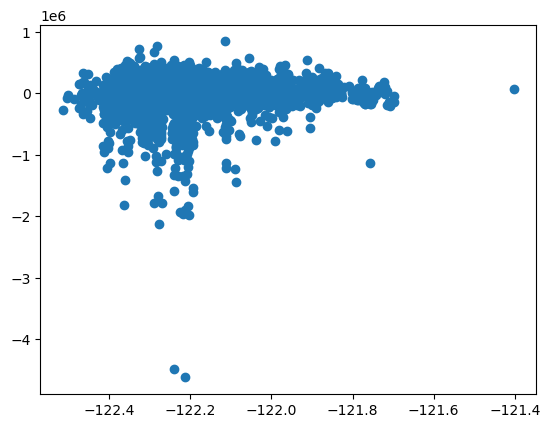

In [453]:
plt.scatter(X_test['long'],elastic_net_pred['res'])

1. For the data cleaning part, I found no find missing value in with describe function, so I move to the feature engineering part. In feature engineering, I extract data columns into year, month, and day because I want to test whether a linear relationship exists between year and price. I create dummy variables for condition and view columns. Then I use a scatter plot to determine the relationship between possible factors with floors to decide which elements to put in independent variables for later linear regression predictions. This is the best method for me because there is no missing data, so I do the basic feature engineering to make the last modeling efficient. A scatter plot can help me determine whether linear relationships exist with price.

2. First, I build several OLS models and calculate the R-squared value to find the best-fitting model. I have tried it many times and find that Latitude, Longitude, and size of living area have a stronger linear relationship with price among all comparisons. It achieves 0.578 on both R-squared and adj. R-squared could be better, but it is the best result I can get. Then I plot residual error with price in scatter; a linear relationship can be found. Besides, influential points appear concretely as 0 to 0.001 H leverage and -5 to 10 studentized residuals. Then I build other linear regression models (LASSO, Ridge, and Elastic Net) to compare which performs best. And calculate the RMSE of each model, Ridge regression should be the best option.

3. The main drivers of house prices in King City can be Latitude, Longitude, and size of living area. Location and housing size generally affect price directly and in linear relationships. Those three components can be restively important for estimating house size within the data, but more is needed for precise estimation.  